In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from Generators import SMOTEGenerator
from Generators import ClusterSMOTEGenerator
from sklearn.metrics import (confusion_matrix,classification_report,roc_auc_score)

In [29]:
X, y = make_classification(
    n_samples=2000,
    n_clusters_per_class=1,
    n_features=2,
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0,    
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [30]:
baseline_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

baseline_pipe.fit(X_train, y_train)
y_pred_base = baseline_pipe.predict(X_test)

print("Baseline Confusion Matrix")
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

Baseline Confusion Matrix
[[527  12]
 [ 33  28]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       539
           1       0.70      0.46      0.55        61

    accuracy                           0.93       600
   macro avg       0.82      0.72      0.76       600
weighted avg       0.92      0.93      0.92       600



In [31]:
smote_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTEGenerator(random_state=42)),
    ('clf', LogisticRegression())
])

smote_pipe.fit(X_train, y_train)
y_pred_smote = smote_pipe.predict(X_test)

print("SMOTE Confusion Matrix")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

SMOTE Confusion Matrix
[[483  56]
 [  2  59]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       539
           1       0.51      0.97      0.67        61

    accuracy                           0.90       600
   macro avg       0.75      0.93      0.81       600
weighted avg       0.95      0.90      0.92       600



In [32]:
cluster_smote_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('cluster_smote', ClusterSMOTEGenerator(k_neighbors=5, n_clusters=3, random_state=42)),
    ('clf', LogisticRegression())
])

cluster_smote_pipe.fit(X_train, y_train)
y_pred_cluster = cluster_smote_pipe.predict(X_test)

print("Cluster-SMOTE Confusion Matrix")
print(confusion_matrix(y_test, y_pred_cluster))
print(classification_report(y_test, y_pred_cluster))

Cluster-SMOTE Confusion Matrix
[[485  54]
 [  3  58]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       539
           1       0.52      0.95      0.67        61

    accuracy                           0.91       600
   macro avg       0.76      0.93      0.81       600
weighted avg       0.95      0.91      0.92       600



In [33]:
from sklearn.metrics import f1_score, recall_score , precision_score

results = {
    "Baseline": (
        precision_score(y_test,y_pred_base),
        recall_score(y_test, y_pred_base),
        f1_score(y_test, y_pred_base)
    ),
    "SMOTE": (
        precision_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_smote)
    ),
    "Cluster-SMOTE": (
        precision_score(y_test, y_pred_cluster),
        recall_score(y_test, y_pred_cluster),
        f1_score(y_test, y_pred_cluster)
    )
}

results

{'Baseline': (0.7, 0.45901639344262296, 0.5544554455445545),
 'SMOTE': (0.5130434782608696, 0.9672131147540983, 0.6704545454545454),
 'Cluster-SMOTE': (0.5178571428571429, 0.9508196721311475, 0.6705202312138728)}

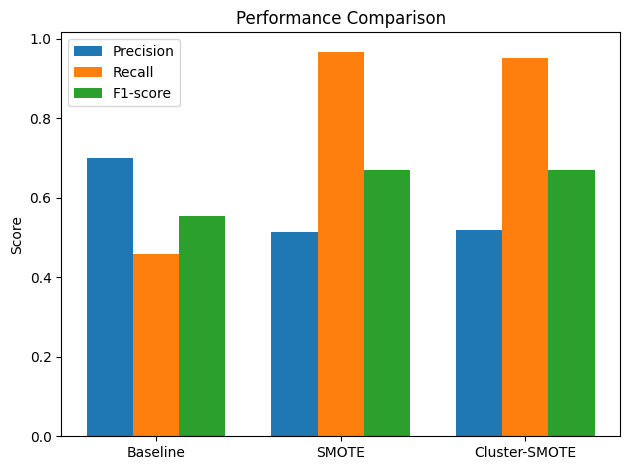

In [34]:
labels = list(results.keys())
precision = [results[k][0] for k in labels]
recalls = [results[k][1] for k in labels]
f1s = [results[k][2] for k in labels]

x = np.arange(len(labels))
width = 0.25  
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1s, width, label='F1-score')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title("Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()